---

# Fonctions Graph

---

## Imports

In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

---

## Obtenez un ensemble de données pratique pour jouer avec

Ceci n'est qu'à titre de démonstration. Sauter cette section lors de l'implémentation de ces fonctions dans votre notebook avec votre dataframe

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
dataset = fetch_california_housing()

In [4]:
df = pd.DataFrame(dataset.data,
                  columns=[dataset.feature_names]
                  )
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
df.shape

(20640, 8)

In [6]:
df['price'] = 100_000 * dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0


In [7]:
df.isna().sum().sum()

0

In [8]:
df.columns

MultiIndex(levels=[['AveBedrms', 'AveOccup', 'AveRooms', 'HouseAge', 'Latitude', 'Longitude', 'MedInc', 'Population', 'price']],
           labels=[[6, 3, 2, 0, 7, 1, 4, 5, 8]])

In [9]:
df.columns = df.columns.get_level_values(0)

In [10]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'price'],
      dtype='object')

---

## Fonction:  Correlation Heatmap avec moitié cachée


In [11]:
# Paramètre requis : dataframe ... le dataframe pandas de référence.
# Paramètres optionnels : titre .... (chaîne) titre du graphique
# file .... (chaîne) chemin d'accès+nom du fichier si vous voulez sauvegarder l'image


def half_masked_corr_heatmap(dataframe, title=None, file=None):
    plt.figure(figsize=(9,9))
    sns.set(font_scale=1)

    mask = np.zeros_like(dataframe.corr())
    mask[np.triu_indices_from(mask)] = True

    with sns.axes_style("white"):
        sns.heatmap(dataframe.corr(), mask=mask, annot=True, cmap='coolwarm')

    if title: plt.title(f'\n{title}\n', fontsize=18)
    plt.xlabel('')    # optionnel au cas où vous voudriez une étiquette sur l'axe des X
    plt.ylabel('')    # optionnel au cas où vous voudriez une étiquette sur l'axe des Y
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();
    
    return

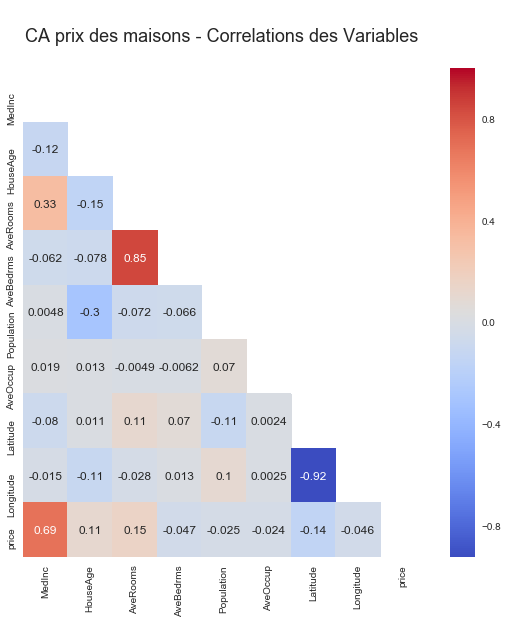

In [12]:
half_masked_corr_heatmap(df,
                         'CA prix des maisons - Correlations des Variables ',
                         )

---

## Fonction : Corr à une variable cible (spectre de chaleur)


In [13]:
# Paramètres requis : dataframe ... le dataframe pandas de référence.
# target .... (chaîne de caractères) nom de colonne de la variable cible

# Paramètres optionnels : titre .... (chaîne) titre du graphique
# file .... (chaîne) chemin d'accès+nom du fichier si vous voulez sauvegarder l'image

def corr_to_target(dataframe, target, title=None, file=None):
    plt.figure(figsize=(4,6))
    sns.set(font_scale=1)
    
    sns.heatmap(dataframe.corr()[[target]].sort_values(target,
                                                ascending=False)[1:],
                annot=True,
                cmap='coolwarm')
    
    if title: plt.title(f'\n{title}\n', fontsize=18)
    plt.xlabel('')    # optionnel au cas où vous voudriez une étiquette sur l'axe des X
    plt.ylabel('')    # optionnel au cas où vous voudriez une étiquette sur l'axe des Y
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();
    
    return

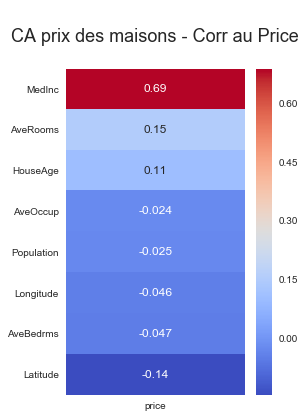

In [14]:
corr_to_target(df, 'price',
               'CA prix des maisons - Corr au Price',
               './article2_images/corr_au_price.jpg'
              )

---

## Fonction : Diagrammes de dispersion de toutes les variables par rapport à la cible


In [15]:
# N-diagrammes de dispersion de chaque entité par rapport à la cible...
# Paramètres requis : dataframe ... le dataframe pandas de référence.
# target .... (chaîne de caractères) nom de colonne de la variable cible

# Paramètres optionnels : titre .... (chaîne) titre du graphique
# file .... (chaîne) chemin d'accès+nom du fichier si vous voulez sauvegarder l'imagege


def gen_scatterplots(dataframe, target_column, list_of_columns, cols=1, file=None):
    rows      = math.ceil(len(list_of_columns)/cols)
    figwidth  = 5 * cols
    figheight = 4 * rows

    fig, ax = plt.subplots(nrows   = rows,
                           ncols   = cols,
                           figsize = (figwidth, figheight))
    
    color_choices = ['blue', 'grey', 'goldenrod', 'r', 'black', 'darkorange', 'g']

    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    ax = ax.ravel()         #  Ravel transforme une matrice en vecteur... plus facile à itérer

    for i, column in enumerate(list_of_columns):
        ax[i].scatter(dataframe[column],
                      dataframe[target_column],
                      color=color_choices[i % len(color_choices)],
                      alpha = 0.1)

#           Titres des sous-plots individuelss, facultatif
#             ax[i].set_title(f'{column} vs. {target_column}', fontsize=18)

        ax[i].set_ylabel(f'{target_column}', fontsize=14)
        ax[i].set_xlabel(f'{column}', fontsize=14)

    fig.suptitle('\nEach Feature vs. Target Scatter Plots', size=24)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0, top=0.88)
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();
    return

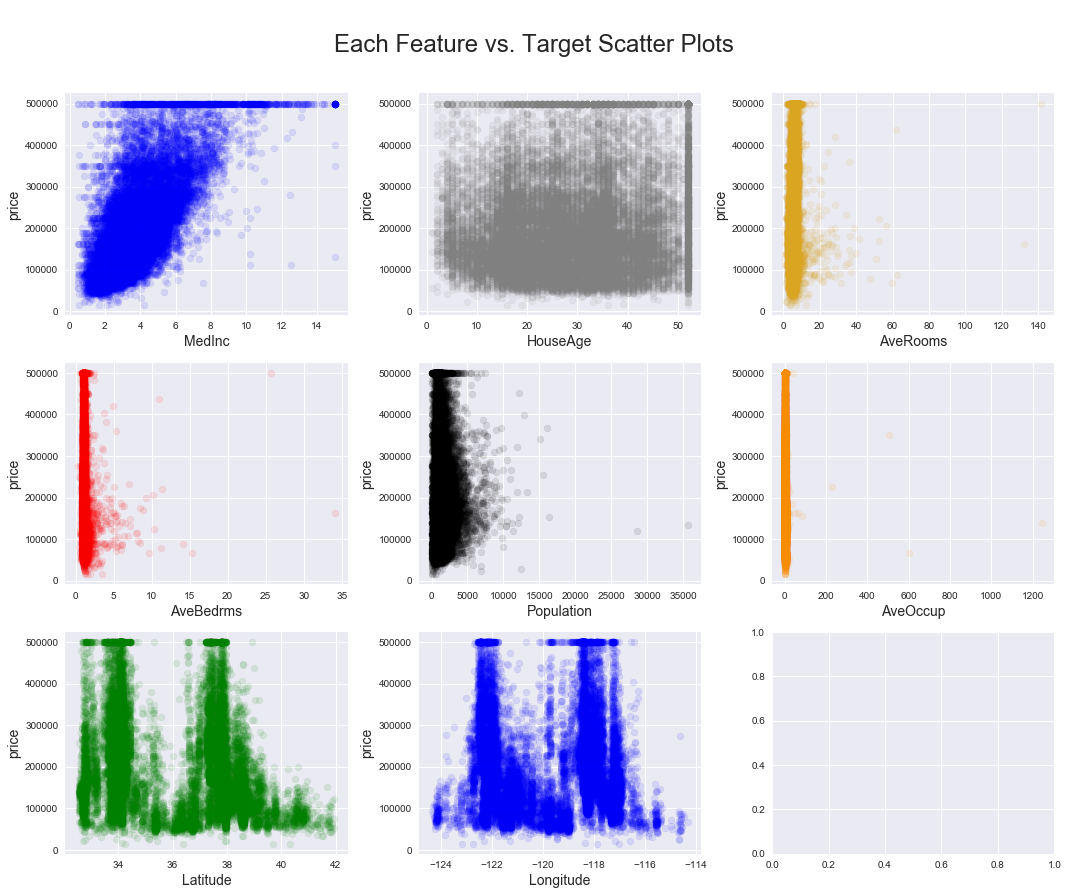

In [16]:
feature_cols = [col for col in df.columns if col != 'price']
gen_scatterplots(df, 'price',
                 feature_cols,
                 3,
                 './article2_images/diagramme-dispersion.jpg'
                )

---

## Fonction : N- Histogrammes croisés de chaque variable


In [17]:
# N- Histogrammes croisés de chaque variable de la trame de données...
# Paramètre requis : dataframe ... le dataframe pandas de référence.

# Paramètres optionnels : cols .... nombre de colonnes de sous-plot sur la figure ; par défaut=1
# file .... (chaîne) chemin d'accès+nom du fichier si vous voulez sauvegarder l'image

def gen_histograms(dataframe, cols=1, file=None):
    rows      = math.ceil(len(dataframe.columns)/cols)
    figwidth  = 5 * cols
    figheight = 4 * rows

    fig, ax = plt.subplots(nrows   = rows,
                           ncols   = cols,
                           figsize = (figwidth, figheight))
    
    color_choices = ['blue', 'grey', 'goldenrod', 'r', 'black', 'darkorange', 'g']
    ax = ax.ravel()         

    for i, column in enumerate(dataframe.columns):
        ax[i].hist(dataframe[column],
                      color=color_choices[i % len(color_choices)],
                      alpha = 1)
        
        ax[i].set_title(f'{dataframe[column].name}', fontsize=18)
        ax[i].set_ylabel('Observations', fontsize=14)
        ax[i].set_xlabel('', fontsize=14)
        
    fig.suptitle('\nHistogramme de toutes les varaibles du dataframe', size=24)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0, top=0.88)
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();

    return

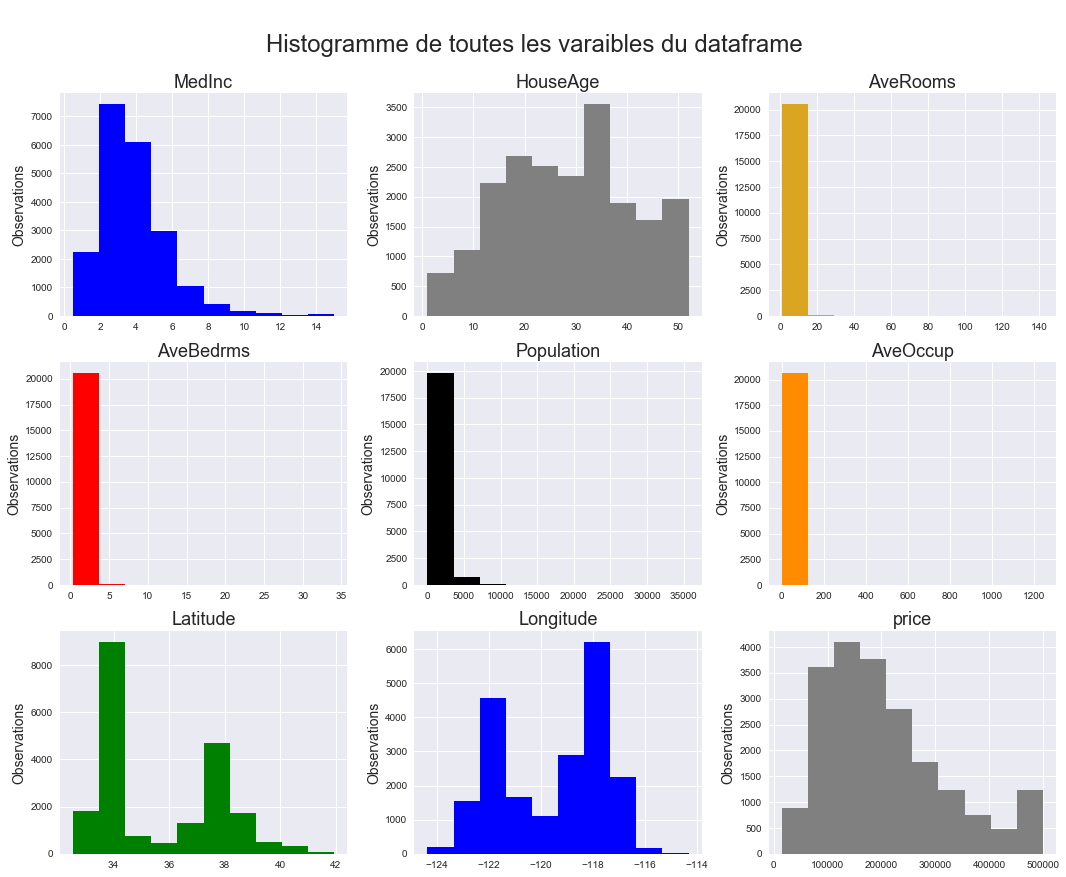

In [18]:
gen_histograms(df, 3,
               './article2_images/histo_toutes_var.jpg'
              )

---

## Fonction:  Boxplots


In [19]:
# N-compartition des boxplots de chaque variable dans le dataframe...
# Paramètre requis : dataframe ... le dataframe pandas de référence.

# Paramètres optionnels : cols .... nombre de colonnes de sous-placettes sur la figure ; par défaut=1
# file .... (chaîne) chemin d'accès+nom du fichier si vous voulez sauvegarder l'image


def gen_boxplots(dataframe, cols=1, file=None):
    rows      = math.ceil(len(dataframe.columns)/cols)
    figwidth  = 5 * cols
    figheight = 4 * rows

    fig, ax = plt.subplots(nrows   = rows,
                           ncols   = cols,
                           figsize = (figwidth, figheight))
    
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    ax = ax.ravel()         

    for i, column in enumerate(dataframe.columns):
        ax[i].boxplot(dataframe[column])
        
        ax[i].set_title(f'{dataframe[column].name}', fontsize=18)
        ax[i].set_ylabel('', fontsize=14)
        ax[i].set_xlabel('', fontsize=14)
        ax[i].tick_params(labelbottom=False)
        
    fig.suptitle('\nBoxplots de toutes les variables du Dataframe', size=24)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0, top=0.88)
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();

    return

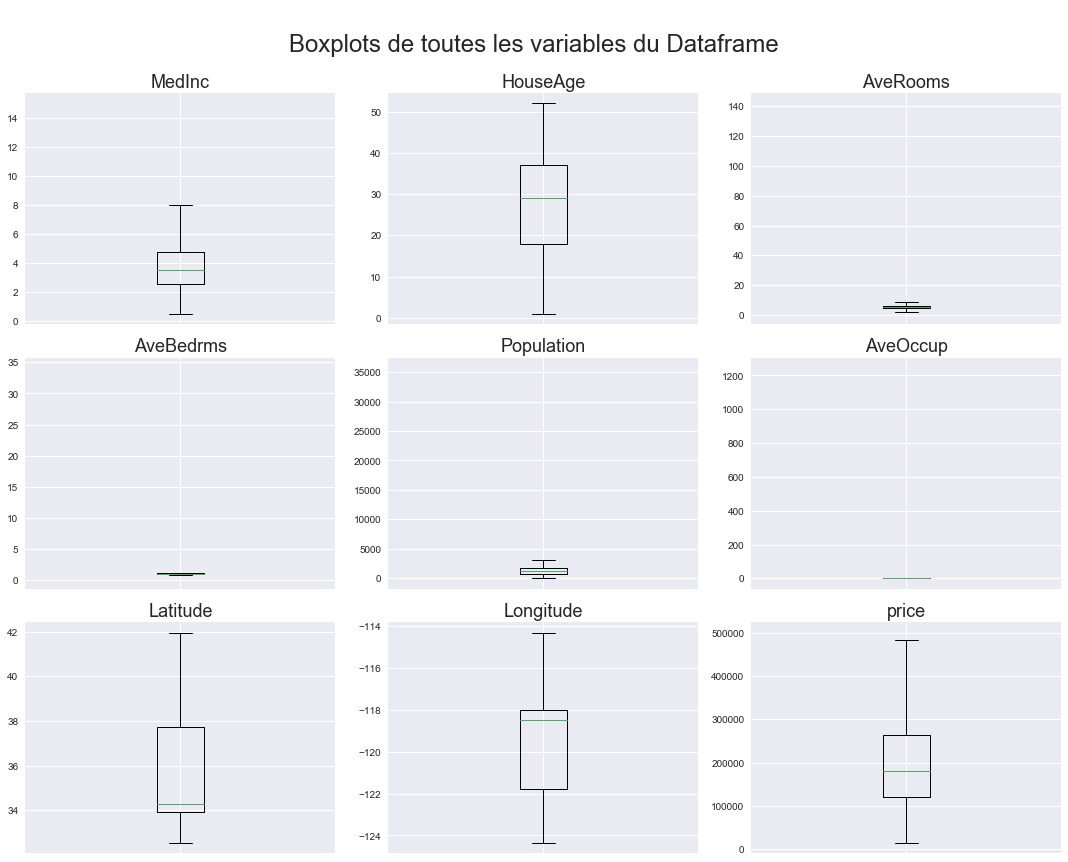

In [20]:
gen_boxplots(df, 3,
             './article2_images/boxplots_toutes_var.jpg'
            )

---

## Fonction :  Graphiques à lignes N croisées


In [21]:
# N-Graphiques linéaires croisés de chaque variable dans le dataframe ...
# Paramètre requis : dataframe ... le dataframe pandas de référence.

# Paramètres optionnels : cols .... nombre de colonnes de sous-graph sur la figure ; par défaut=1
# file .... (chaîne) chemin d'accès+nom du fichier si vous voulez sauvegarder l'image


def gen_linecharts(dataframe, cols=1, file=None):
    list_of_columns = list(dataframe.columns)
    rows      = math.ceil(len(list_of_columns)/cols)
    figwidth  = 5 * cols
    figheight = 4 * rows

    fig, ax = plt.subplots(nrows   = rows,
                           ncols   = cols,
                           figsize = (figwidth, figheight))
    
    color_choices = ['blue', 'grey', 'goldenrod', 'r', 'black', 'darkorange', 'g']

    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    ax = ax.ravel()         

    for i, column in enumerate(list_of_columns):
        ax[i].plot(dataframe[column],
                   color=color_choices[i % len(color_choices)])
        
        ax[i].set_title(f'{column}', fontsize=18)
        ax[i].set_ylabel(f'{column}', fontsize=14)
        
    fig.suptitle('\nGraph ligne de toutes les variables duDataframe', size=24)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0, top=0.88)
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();
    
    return

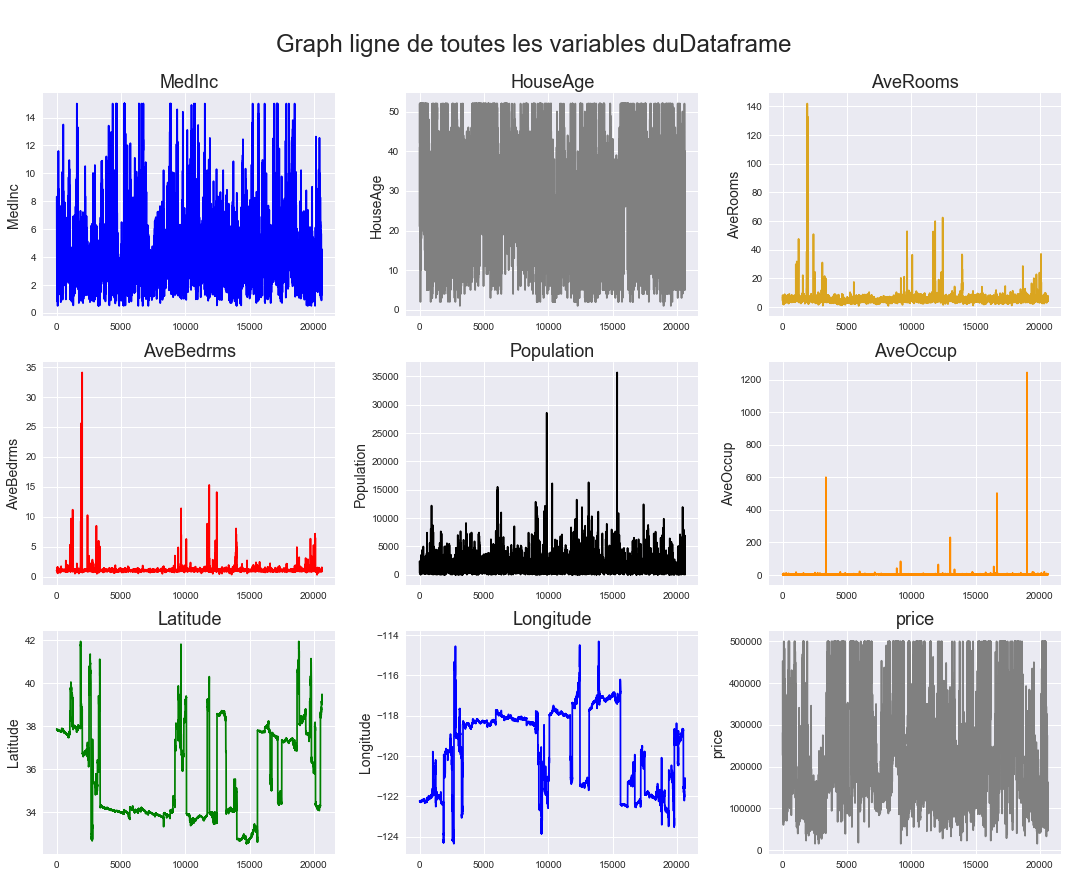

In [22]:
gen_linecharts(df, 3,
               './article2_images/toutes_var_ligne_graph.jpg'
              )

---

## Fonction : N-Graphiques linéaires croisés avec moyennes mobiles spécifiées par l'utilisateur


In [23]:
# N-croisé N-Graphiques de ligne moyenne déroulante de chaque variable dans le dataframe ....
# Paramètres requis : dataframe ... le dataframe pandas de référence.
# roll_num ... périodes sur lesquelles calculer la moyenne roulante.

# Paramètres optionnels : cols .... nombre de colonnes de sous-graph sur la figure ; par défaut=1
# file .... (chaîne) chemin d'accès+nom du fichier si vous voulez sauvegarder l'image

def gen_linecharts_rolling(dataframe, roll_num, cols=1, file=None):
    list_of_columns = list(dataframe.columns)    
    rows      = math.ceil(len(list_of_columns)/cols)
    figwidth  = 5 * cols
    figheight = 4 * rows
    
    dataframe = dataframe.rolling(roll_num).mean()

    fig, ax = plt.subplots(nrows   = rows,
                           ncols   = cols,
                           figsize = (figwidth, figheight))
    
    color_choices = ['blue', 'grey', 'goldenrod', 'r', 'black', 'darkorange', 'g']

    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    ax = ax.ravel()         # 

    for i, column in enumerate(list_of_columns):
        ax[i].plot(dataframe[column],
                   color=color_choices[i % len(color_choices)])
        
        ax[i].set_title(f'{column}', fontsize=18)
        ax[i].set_ylabel(f'{column}', fontsize=14)
        ax[i].set_xlabel('Time', fontsize=14)
        
    fig.suptitle('\nMoyenne des lignes de chaque variables', size=24)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0, top=0.88)
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();
    
    return

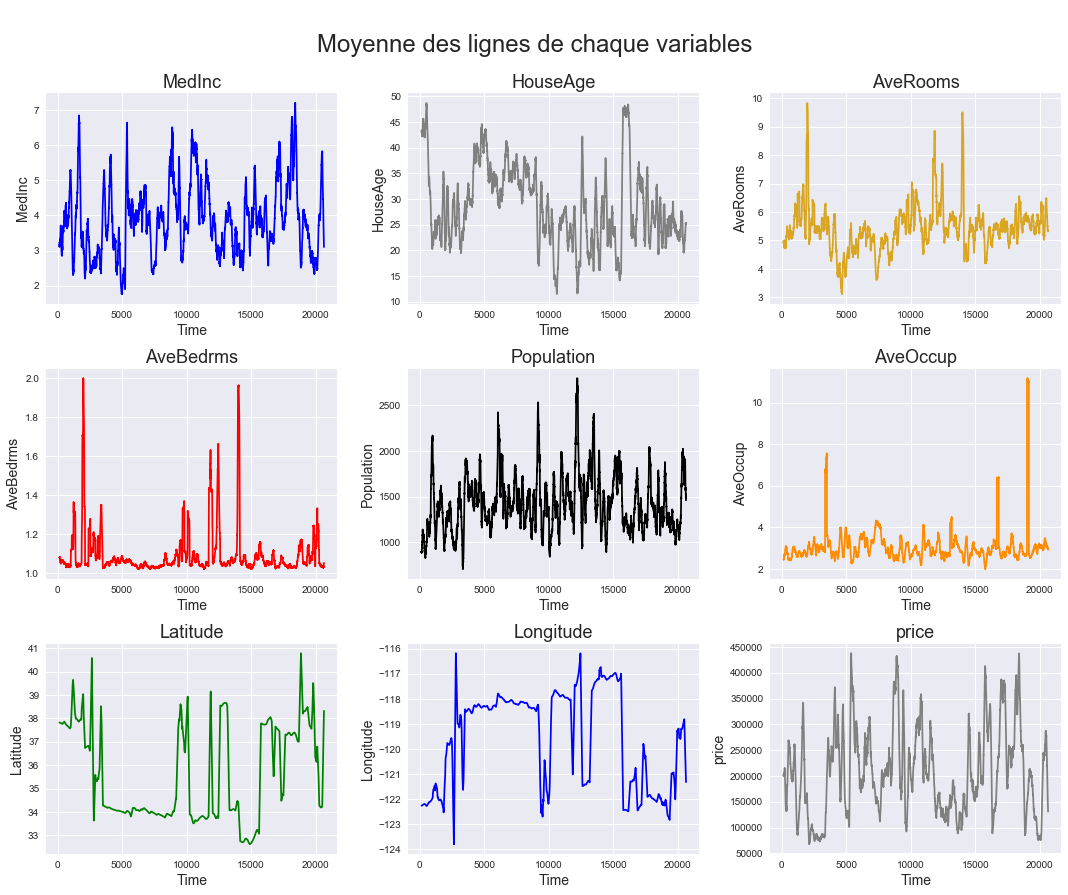

In [24]:
gen_linecharts_rolling(df, 150, 3,
                      './article2_images/Toutes_var_moyenne.jpg'
                      )